In [362]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

text_data = pd.read_excel('textresponses_20200501.xlsx')
text_data.head(5)
print("Total Free Responses:", len(text_data))

#The UNIVERSITY_KEY was created to introduced public or private classification
#We also had early plans to determine the grading adjustment and dorms decisions,
#however, the information varied across time and while a statement may have been 
#made the actions universities took were at time contradictory

university_key = pd.read_excel('University_Key.xlsx')
university_key.head(5)

#only keeps responses with a std_inst response
text_updated = pd.merge(text_data,
                 university_key,
                 on='std_inst',
                 how='left')

text_updated.head(5)

Total Free Responses: 857


,basic_text,dis_healthcare,dis_internet,dis_academic,dis_social,dis_psych,inst_apprec,inst_wish,inst_help,inst_text,inst_country,institution,std_inst,pseudu_id,dummy_lang,CS_country,CS_inst,type_inst
0,NaN,N/A or Don't Know,N/A or Don't Know,Much worse than before,Much worse than before,Much worse than before,NaN,NaN,NaN,NaN,United States of America (USA),NaN,NaN,1,0,NaN,NaN,NaN
1,Our university has moved fully to online instr...,Worse than before,Worse than before,Worse than before,Much worse than before,Worse than before,Move everything online and stopped expecting g...,"this all earlier, and would have extended the ...",Pay us more. Now that we essentially must work...,NaN,United States of America (USA),University of California -- San Diego,"University of California, San Diego",2,0,United States of America (USA),"University of California, San Diego",Public
2,I have asthma so I've been very isolated and f...,Much worse than before,Much worse than before,N/A or Don't Know,Much worse than before,Much worse than before,Online classes,More information,Prepare for emergencies,NaN,United States of America (USA),UC San Diego,"University of California, San Diego",3,0,United States of America (USA),"University of California, San Diego",Public
3,NaN,Same as before,Same as before,Same as before,Much worse than before,Worse than before,Close in a timely manner,Communicated better with My undergraduate stud...,Provide more guidance to intl students,NaN,Canada,McGill University,McGill University,4,0,Canada,McGill University,Public
4,"Dorms and residences aren't closed, but underg...",N/A or Don't Know,Same as before,Much worse than before,Much worse than before,Worse than before,moved to virtual classes sooner than most othe...,made courses pass/fail even for graduate students,relax requirements for this semester,NaN,United States of America (USA),Columbia University in the City of New York,Columbia University,5,0,United States of America (USA),Columbia University,Private


In [363]:
#now to drop un wanted columns
print("Total Responses with Univeristy Identified:", len(text_updated))

text_updated.isnull().sum()

Total Responses with Univeristy Identified: 857


basic_text        434
dis_healthcare     67
dis_internet       69
dis_academic       72
dis_social         73
dis_psych          73
inst_apprec       355
inst_wish         375
inst_help         435
inst_text         761
inst_country       96
institution       165
std_inst          165
pseudu_id           0
dummy_lang          0
CS_country        168
CS_inst           168
type_inst         168
dtype: int64

In [364]:
text_updated['final_country'] = np.where(text_updated['CS_country'].isnull(),text_updated['inst_country'],text_updated['CS_country'])

#now to drop values
text_updated = text_updated.drop(columns=['inst_country', 'institution', 'std_inst', 'CS_country'])
text_updated.head(5)

,basic_text,dis_healthcare,dis_internet,dis_academic,dis_social,dis_psych,inst_apprec,inst_wish,inst_help,inst_text,pseudu_id,dummy_lang,CS_inst,type_inst,final_country
0,NaN,N/A or Don't Know,N/A or Don't Know,Much worse than before,Much worse than before,Much worse than before,NaN,NaN,NaN,NaN,1,0,NaN,NaN,United States of America (USA)
1,Our university has moved fully to online instr...,Worse than before,Worse than before,Worse than before,Much worse than before,Worse than before,Move everything online and stopped expecting g...,"this all earlier, and would have extended the ...",Pay us more. Now that we essentially must work...,NaN,2,0,"University of California, San Diego",Public,United States of America (USA)
2,I have asthma so I've been very isolated and f...,Much worse than before,Much worse than before,N/A or Don't Know,Much worse than before,Much worse than before,Online classes,More information,Prepare for emergencies,NaN,3,0,"University of California, San Diego",Public,United States of America (USA)
3,NaN,Same as before,Same as before,Same as before,Much worse than before,Worse than before,Close in a timely manner,Communicated better with My undergraduate stud...,Provide more guidance to intl students,NaN,4,0,McGill University,Public,Canada
4,"Dorms and residences aren't closed, but underg...",N/A or Don't Know,Same as before,Much worse than before,Much worse than before,Worse than before,moved to virtual classes sooner than most othe...,made courses pass/fail even for graduate students,relax requirements for this semester,NaN,5,0,Columbia University,Private,United States of America (USA)


In [365]:
text_updated = text_updated.fillna(0)
text_updated.isnull().sum()

basic_text        0
dis_healthcare    0
dis_internet      0
dis_academic      0
dis_social        0
dis_psych         0
inst_apprec       0
inst_wish         0
inst_help         0
inst_text         0
pseudu_id         0
dummy_lang        0
CS_inst           0
type_inst         0
final_country     0
dtype: int64

In [366]:
text_updated.dis_healthcare.unique()

array(["N/A or Don't Know", 'Worse than before', 'Much worse than before',
       'Same as before', 0, 'Better than before',
       'Much better than before'], dtype=object)

In [367]:
X=({"N/A or Don't Know": 0, 'Much worse than before':1, 'Worse than before':2,
       'Same as before':3, 'Better than before':4,
       'Much better than before':5})


text_updated['dis_healthcare'] = text_updated['dis_healthcare'].replace(X)
text_updated['dis_internet'] = text_updated['dis_internet'].replace(X)
text_updated['dis_academic'] = text_updated['dis_academic'].replace(X)
text_updated['dis_social'] = text_updated['dis_social'].replace(X)
text_updated['dis_psych'] = text_updated['dis_psych'].replace(X)

In [368]:
text_updated.head(5)

,basic_text,dis_healthcare,dis_internet,dis_academic,dis_social,dis_psych,inst_apprec,inst_wish,inst_help,inst_text,pseudu_id,dummy_lang,CS_inst,type_inst,final_country
0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,United States of America (USA)
1,Our university has moved fully to online instr...,2,2,2,1,2,Move everything online and stopped expecting g...,"this all earlier, and would have extended the ...",Pay us more. Now that we essentially must work...,0,2,0,"University of California, San Diego",Public,United States of America (USA)
2,I have asthma so I've been very isolated and f...,1,1,0,1,1,Online classes,More information,Prepare for emergencies,0,3,0,"University of California, San Diego",Public,United States of America (USA)
3,0,3,3,3,1,2,Close in a timely manner,Communicated better with My undergraduate stud...,Provide more guidance to intl students,0,4,0,McGill University,Public,Canada
4,"Dorms and residences aren't closed, but underg...",0,3,1,1,2,moved to virtual classes sooner than most othe...,made courses pass/fail even for graduate students,relax requirements for this semester,0,5,0,Columbia University,Private,United States of America (USA)


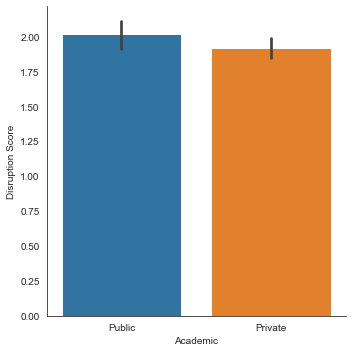

In [369]:
#####Figures, figures, figures
#Is there a difference in the disruption scores for public vs. private?
#x-axis 5 variables
#y is the mean of each excluding 0 which are blanks and NA
#split by public vs. private

aca_data  = text_updated[text_updated.type_inst != 0]
aca_data  = text_updated[text_updated.dis_academic != 0]
ax = sns.catplot(x='type_inst', 
                 y='dis_academic', 
                 order=["Public", "Private"],
                 kind='bar',
                 data=aca_data)
ax.set(xlabel='Academic', ylabel='Disruption Score')

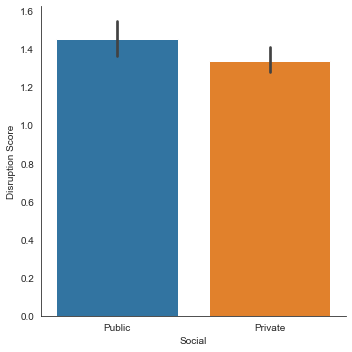

In [370]:
soc_data  = text_updated[text_updated.type_inst != 0]
soc_data  = text_updated[text_updated.dis_social != 0]
ax = sns.catplot(x='type_inst', 
                 y='dis_social', 
                 order=["Public", "Private"],
                 kind='bar',
                 data=soc_data)
ax.set(xlabel='Social', ylabel='Disruption Score')

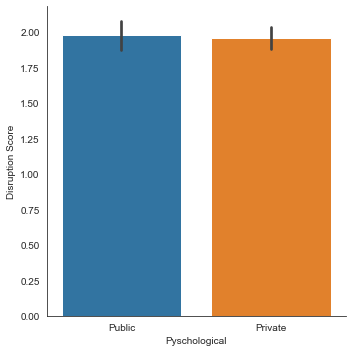

In [371]:
psych_data  = text_updated[text_updated.type_inst != 0]
psych_data  = text_updated[text_updated.dis_psych != 0]
ax = sns.catplot(x='type_inst', 
                 y='dis_psych', 
                 order=["Public", "Private"],
                 kind='bar',
                 data=psych_data)
ax.set(xlabel='Pyschological', ylabel='Disruption Score')

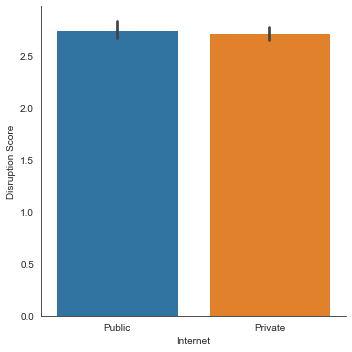

In [372]:
internet_data  = text_updated[text_updated.type_inst != 0]
internet_data  = text_updated[text_updated.dis_internet != 0]
ax = sns.catplot(x='type_inst', 
                 y='dis_internet', 
                 order=["Public", "Private"],
                 kind='bar',
                 data=internet_data)
ax.set(xlabel='Internet', ylabel='Disruption Score')

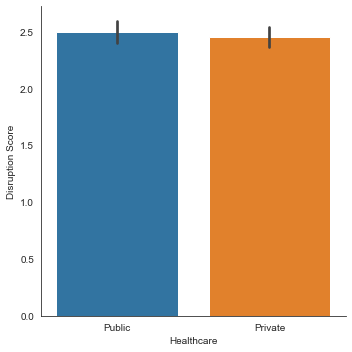

In [373]:
health_data  = text_updated[text_updated.type_inst != 0]
health_data  = text_updated[text_updated.dis_healthcare != 0]
ax = sns.catplot(x='type_inst', 
                 y='dis_healthcare', 
                 order=["Public", "Private"],
                 kind='bar',
                 data=health_data)
ax.set(xlabel='Healthcare', ylabel='Disruption Score')

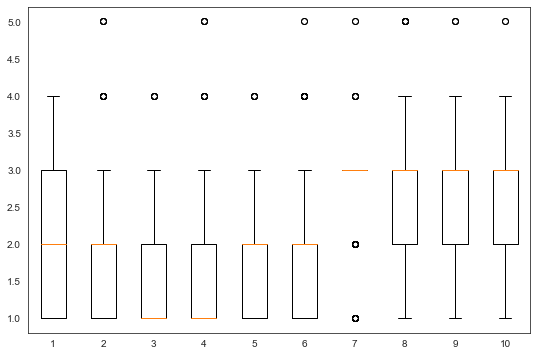

In [374]:
a_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_academic'] >0), 'dis_academic']
a_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_academic'] >0), 'dis_academic']
s_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_social'] >0), 'dis_social']
s_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_social'] >0), 'dis_social']
p_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_psych'] >0), 'dis_psych']
p_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_psych'] >0), 'dis_psych']
i_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_internet'] >0), 'dis_internet']
i_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_internet'] >0), 'dis_internet']
h_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_healthcare'] >0), 'dis_healthcare']
h_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_healthcare'] >0), 'dis_healthcare']

values = [a_public, a_private, s_public, s_private, p_public, p_private, i_public, i_private,  h_public, h_private]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(values)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

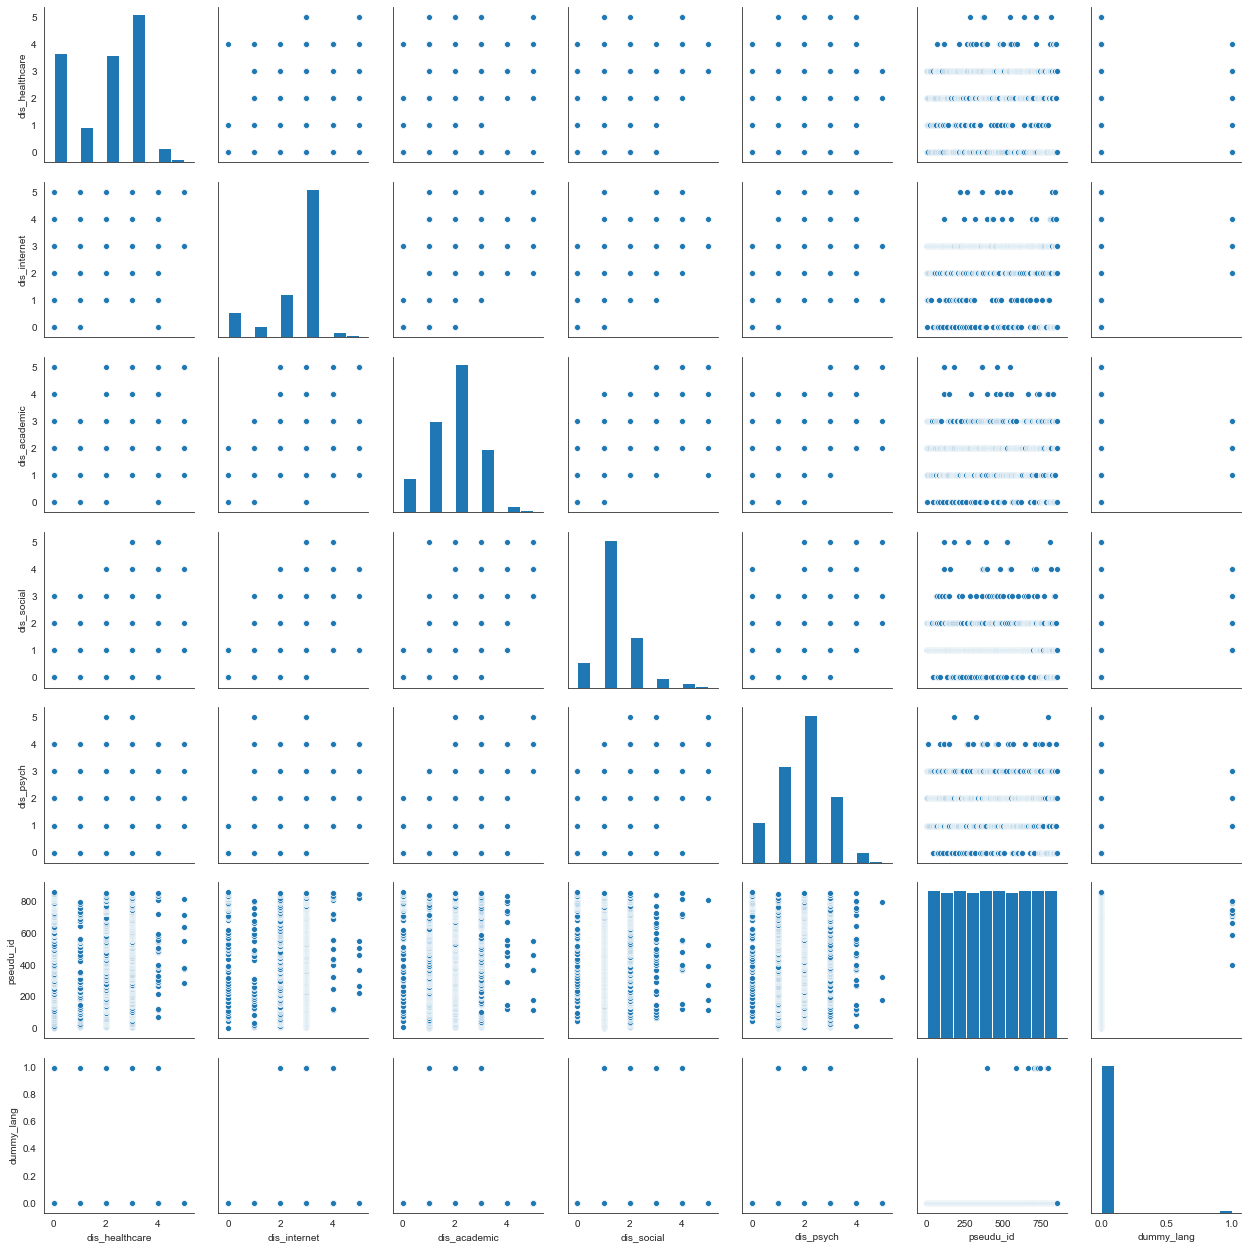

In [375]:
# Basic correlogram
sns.pairplot(text_updated)

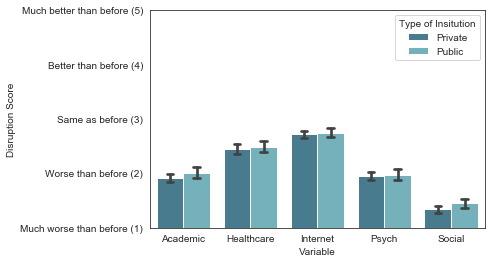

2.01673640167364
1.9150943396226414
2.4927536231884058
2.447976878612717
2.7510548523206753
2.7173396674584325
1.9748953974895398
1.9545454545454546
1.45
1.3381294964028776
value    1.972798
dtype: float64
value    2.489731
dtype: float64
value    2.734987
dtype: float64
value    1.988189
dtype: float64
value    1.413072
dtype: float64


In [379]:
#final_data = text_updated.loc[(text_updated['dis_academic'] >0)&(text_updated['dis_social'] >0)&
#                              (text_updated['dis_psych'] >0) & (text_updated['dis_internet'] >0)&
#                             (text_updated['dis_healthcare'] >0)]

final_data = text_updated

h = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_healthcare')])
i = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_internet')])
a = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_academic')])
s = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_social')])                     
p = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_psych')])

hm = h.append(i)
hm = hm.append(a)
hm = hm.append(s)
hm = hm.append(p)
hm = hm[(hm.type_inst != 'Unknown')]
hm = hm[(hm.type_inst != 0)]
hm = hm[(hm.value != 0)]

vals =({"dis_healthcare": "Healthcare", 'dis_social':'Social', 'dis_psych':'Psych',
    'dis_internet':'Internet', 'dis_academic':'Academic'})

hm['variable'] = hm['variable'].replace(vals)
hm = hm.sort_values('variable')
hm.rename(columns={'type_inst':'Type of Insitution'}, 
                 inplace=True)

final = sns.barplot(x='variable', y='value', hue='Type of Insitution', data = hm, capsize=.1, palette="GnBu_d")

final.set(xlabel='Variable', ylabel='Disruption Score', ylim =(1,5))
y_values = [1,2,3,4,5]
y_new=['Much worse than before (1)', 'Worse than before (2)',
       'Same as before (3)', 'Better than before (4)',
       'Much better than before (5)']
plt.yticks(y_values, y_new)

plt.savefig('pubvpri_barplot.png', bbox_inches='tight')
plt.show()
print(a_public.mean())
print(a_private.mean())
print(h_public.mean())
print(h_private.mean())
print(i_public.mean())
print(i_private.mean())
print(p_public.mean())
print(p_private.mean())
print(s_public.mean())
print(s_private.mean())

a = a[(a.value != 0)]
print(a.mean())
h = h[(h.value != 0)]
print(h.mean())
i = i[(i.value != 0)]
print(i.mean())
p = p[(p.value != 0)]
print(p.mean())
s = s[(s.value != 0)]
print(s.mean())

In [ ]:
text_updated['type_inst'].value_counts()

In [ ]:
text_updated['final_country'].value_counts()

In [383]:
from wordcloud import WordCloud, STOPWORDS

word_cloud = text_updated['final_country'].value_counts()
text = word_cloud.values 
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

NameError: name 'stop_words' is not defined